In [1]:
import os
os.chdir('/Users/ahutchin/Library/CloudStorage/OneDrive-SyracuseUniversity/Syracuse - Classes/IST 718 - Big Data Analytics/Project/Data Sets')
print(os.getcwd())


/Users/ahutchin/Library/CloudStorage/OneDrive-SyracuseUniversity/Syracuse - Classes/IST 718 - Big Data Analytics/Project/Data Sets


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib as plt 
import matplotlib.pyplot as plt
import seaborn as sns
import random 
import plotly.express as px


In [3]:
#set seed so that the results will be the same anhtime this program is run
random.seed(22)

********

OBTAIN THE DATA

In [4]:
#import all the data files needed and create data frames
poke_1 = pd.read_excel('pokedex_large_full.xlsx')
poke_2 = pd.read_excel('Pokemon DB large.xlsx')
poke_800 = pd.read_excel('Pokemon800.xlsx')

#poke_train = pd.read_csv('combats.csv')
#poke_test = pd.read_csv('tests.csv')

#allows for the display of all the columns
pd.set_option('display.max_columns' , None)

In [5]:
#poke_1.dtypes
print(poke_1.info())
print(poke_2.info())
print(poke_800.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1045 non-null   int64  
 1   pokedex_number    1045 non-null   int64  
 2   name              1045 non-null   object 
 3   german_name       1045 non-null   object 
 4   japanese_name     1045 non-null   object 
 5   generation        1045 non-null   int64  
 6   status            1045 non-null   object 
 7   species           1045 non-null   object 
 8   type_number       1045 non-null   int64  
 9   type_1            1045 non-null   object 
 10  type_2            553 non-null    object 
 11  height_m          1045 non-null   float64
 12  weight_kg         1044 non-null   float64
 13  abilities_number  1045 non-null   int64  
 14  ability_1         1042 non-null   object 
 15  ability_2         516 non-null    object 
 16  ability_hidden    813 non-null    object 


In [6]:
#drop columns that will not be useful to analysis goals
poke_1.drop(['Unnamed: 0', 'german_name', 'japanese_name', 'egg_type_1','egg_type_2', 'egg_type_number', 'egg_cycles', \
             'base_friendship','growth_rate', 'total_points'], axis = 'columns', inplace = True)
poke_1.head()

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_experience,percentage_male,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,1,Normal,Seed Pok√©mon,2,Grass,Poison,0.7,6.9,2,Overgrow,NaN,Chlorophyll,45,49,49,65,65,45,45.0,64.0,87.5,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,1,Normal,Seed Pok√©mon,2,Grass,Poison,1.0,13.0,2,Overgrow,NaN,Chlorophyll,60,62,63,80,80,60,45.0,142.0,87.5,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,1,Normal,Seed Pok√©mon,2,Grass,Poison,2.0,100.0,2,Overgrow,NaN,Chlorophyll,80,82,83,100,100,80,45.0,236.0,87.5,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,Mega Venusaur,1,Normal,Seed Pok√©mon,2,Grass,Poison,2.4,155.5,1,Thick Fat,NaN,NaN,80,100,123,122,120,80,45.0,281.0,87.5,1.0,1.0,0.5,0.5,0.25,1.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,1,Normal,Lizard Pok√©mon,1,Fire,NaN,0.6,8.5,2,Blaze,NaN,Solar Power,39,52,43,60,50,65,45.0,62.0,87.5,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [7]:
poke_2.head()

,Pokemon Id,Pokedex Number,Pokemon Name,Classification,Alternate Form Name,Original Pokemon ID,Legendary Type,Pokemon Height,Pokemon Weight,Primary Type,Secondary Type,Primary Ability,Primary Ability Description,Secondary Ability,Secondary Ability Description,Hidden Ability,Hidden Ability Description,Special Event Ability,Special Event Ability Description,Male Ratio,Female Ratio,Base Happiness,Game(s) of Origin,Health Stat,Attack Stat,Defense Stat,Special Attack Stat,Special Defense Stat,Speed Stat,Base Stat Total,Health EV,Attack EV,Defense EV,Special Attack EV,Special Defense EV,Speed EV,EV Yield Total,Catch Rate,Experience Growth,Experience Growth Total,Primary Egg Group,Secondary Egg Group,Egg Cycle Count,Pre-Evolution Pokemon Id,Evolution Details
0,1,1,"""Bulbasaur""","""Seed Pokémon""",NaN,NaN,NaN,0.7,6.9,"""Grass""","""Poison""","""Overgrow""","""Powers up Grass-type moves when the Pokémon's...",NaN,NaN,"""Chlorophyll""","""Boosts the Pokémon's Speed stat in harsh sunl...",NaN,NaN,87.5,12.5,50,"""Red""",45,49,49,65,65,45,318,0,0,0,1,0,0,1,45,"""Medium Slow""",1059860,"""Monster""","""Grass""",20,NaN,NaN
1,2,2,"""Ivysaur""","""Seed Pokémon""",NaN,NaN,NaN,1.0,13.0,"""Grass""","""Poison""","""Overgrow""","""Powers up Grass-type moves when the Pokémon's...",NaN,NaN,"""Chlorophyll""","""Boosts the Pokémon's Speed stat in harsh sunl...",NaN,NaN,87.5,12.5,50,"""Red""",60,62,63,80,80,60,405,0,0,0,1,1,0,2,45,"""Medium Slow""",1059860,"""Monster""","""Grass""",20,1.0,"""Level 16"""
2,3,3,"""Venusaur""","""Seed Pokémon""",NaN,NaN,NaN,2.0,100.0,"""Grass""","""Poison""","""Overgrow""","""Powers up Grass-type moves when the Pokémon's...",NaN,NaN,"""Chlorophyll""","""Boosts the Pokémon's Speed stat in harsh sunl...",NaN,NaN,87.5,12.5,50,"""Red""",80,82,83,100,100,80,525,0,0,0,2,1,0,3,45,"""Medium Slow""",1059860,"""Monster""","""Grass""",20,2.0,"""Level 32"""
3,4,3,"""Venusaur""","""Seed Pokémon""","""Mega""",3.0,NaN,2.4,155.5,"""Grass""","""Poison""","""Thick Fat""","""The Pokémon is protected by a layer of thick ...",NaN,NaN,NaN,NaN,NaN,NaN,87.5,12.5,70,"""X""",80,100,123,122,120,80,625,0,0,0,2,1,0,3,45,"""Medium Slow""",1059860,"""Monster""","""Grass""",20,NaN,NaN
4,1526,3,"""Venusaur""","""Seed Pokémon""","""Gigantamax""",3.0,NaN,24.0,0.0,"""Grass""","""Poison""","""Overgrow""","""Powers up Grass-type moves when the Pokémon's...",NaN,NaN,"""Chlorophyll""","""Boosts the Pokémon's Speed stat in harsh sunl...",NaN,NaN,87.5,12.5,50,"""Sword""",80,82,83,100,100,80,525,0,0,0,2,1,0,3,45,"""Medium Slow""",1059860,"""Monster""","""Grass""",20,NaN,NaN


In [8]:
""" poke_2.drop(['Pokemon Id','Pokemon Name', 'Classification', 'Alternate Form', 'Original Pokemon Id','Legendary Type', 'Primary Type', \
             'Secondary Type', 'Primary Ability' ,'Secondary Ability', 'Hidden Ability', 'Special Event Ability', 'Special Event Ability Description', \  
              'Male Ratio', 'Female Ratio', 'Base Happiness' , ], axis = 'columns', inplace = True) """

" poke_2.drop(['Pokemon Id','Pokemon Name', 'Classification', 'Alternate Form', 'Original Pokemon Id','Legendary Type', 'Primary Type',              'Secondary Type', 'Primary Ability' ,'Secondary Ability', 'Hidden Ability', 'Special Event Ability', 'Special Event Ability Description', \\  \n              'Male Ratio', 'Female Ratio', 'Base Happiness' , ], axis = 'columns', inplace = True) "

I started to drop multiple columns from poke_2 since they are repeat from poke_1 however, it ended up being easier to create a list of columns to drop with a certain range (see code below) instead of typing each column individually (like above).

In [9]:
poke_2_columns_drop = list(range(0,1)) + list (range(2,12)) + list(range(13,14)) + list(range(15,16)) + list(range(17,22)) + list(range(23,29)) + list(range(30,44))
poke_2 = poke_2.drop(poke_2.columns[poke_2_columns_drop],axis =1)

In [10]:
poke_2.head()

,Pokedex Number,Primary Ability Description,Secondary Ability Description,Hidden Ability Description,Game(s) of Origin,Base Stat Total,Evolution Details
0,1,"""Powers up Grass-type moves when the Pokémon's...",NaN,"""Boosts the Pokémon's Speed stat in harsh sunl...","""Red""",318,NaN
1,2,"""Powers up Grass-type moves when the Pokémon's...",NaN,"""Boosts the Pokémon's Speed stat in harsh sunl...","""Red""",405,"""Level 16"""
2,3,"""Powers up Grass-type moves when the Pokémon's...",NaN,"""Boosts the Pokémon's Speed stat in harsh sunl...","""Red""",525,"""Level 32"""
3,3,"""The Pokémon is protected by a layer of thick ...",NaN,NaN,"""X""",625,NaN
4,3,"""Powers up Grass-type moves when the Pokémon's...",NaN,"""Boosts the Pokémon's Speed stat in harsh sunl...","""Sword""",525,NaN


In [11]:
# need to rename the columnns that will be used to join the dataframes together so that each column has the same heading
poke_2.rename(columns = {'Pokedex Number' : 'pokedex_number'}, inplace = True)
poke_800.rename(columns = {'#' : 'pokedex_number'}, inplace = True)

In [12]:
#join data frames together on the column column (pokedex_number) to create one full database
poke_go = pd.merge(poke_1, poke_2, on='pokedex_number')
poke_go = pd.merge(poke_go, poke_800, on='pokedex_number')
print(poke_go.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1792 entries, 0 to 1791
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   pokedex_number                 1792 non-null   int64  
 1   name                           1792 non-null   object 
 2   generation                     1792 non-null   int64  
 3   status                         1792 non-null   object 
 4   species                        1792 non-null   object 
 5   type_number                    1792 non-null   int64  
 6   type_1                         1792 non-null   object 
 7   type_2                         1118 non-null   object 
 8   height_m                       1792 non-null   float64
 9   weight_kg                      1792 non-null   float64
 10  abilities_number               1792 non-null   int64  
 11  ability_1                      1786 non-null   object 
 12  ability_2                      634 non-null    o

In [13]:
poke_go.head()


,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_experience,percentage_male,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,Primary Ability Description,Secondary Ability Description,Hidden Ability Description,Game(s) of Origin,Base Stat Total,Evolution Details,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,1,Normal,Seed Pok√©mon,2,Grass,Poison,0.7,6.9,2,Overgrow,NaN,Chlorophyll,45,49,49,65,65,45,45.0,64.0,87.5,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,"""Powers up Grass-type moves when the Pokémon's...",NaN,"""Boosts the Pokémon's Speed stat in harsh sunl...","""Red""",318,NaN,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,1,Normal,Seed Pok√©mon,2,Grass,Poison,1.0,13.0,2,Overgrow,NaN,Chlorophyll,60,62,63,80,80,60,45.0,142.0,87.5,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,"""Powers up Grass-type moves when the Pokémon's...",NaN,"""Boosts the Pokémon's Speed stat in harsh sunl...","""Red""",405,"""Level 16""",Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,1,Normal,Seed Pok√©mon,2,Grass,Poison,2.0,100.0,2,Overgrow,NaN,Chlorophyll,80,82,83,100,100,80,45.0,236.0,87.5,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,"""Powers up Grass-type moves when the Pokémon's...",NaN,"""Boosts the Pokémon's Speed stat in harsh sunl...","""Red""",525,"""Level 32""",Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Venusaur,1,Normal,Seed Pok√©mon,2,Grass,Poison,2.0,100.0,2,Overgrow,NaN,Chlorophyll,80,82,83,100,100,80,45.0,236.0,87.5,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,"""Powers up Grass-type moves when the Pokémon's...",NaN,"""Boosts the Pokémon's Speed stat in harsh sunl...","""Red""",525,"""Level 32""",VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Venusaur,1,Normal,Seed Pok√©mon,2,Grass,Poison,2.0,100.0,2,Overgrow,NaN,Chlorophyll,80,82,83,100,100,80,45.0,236.0,87.5,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,"""The Pokémon is protected by a layer of thick ...",NaN,NaN,"""X""",625,NaN,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


Now that the three dataframes have been joined, I can start working on cleaning up the main data frame by changing column names, dropping special characters or white space in the data, fixing the missining values, etc.

****

***

CLEAN THE DATA

In [14]:
#remove the Pok√©mon from the rest of the species decription in each
poke_go['species'] = poke_go['species'].str.replace("Pok√©mon", "")

#remove the quotation marks from each every row in every column that is classed as an object type
for column in poke_go.columns:
    if poke_go[column].dtype == object:
        poke_go[column] = poke_go[column].str.replace('"', '')

#remove white space 
'''for column in poke_go.columns:
    if poke_go[column].dtype == object:
        poke_go[column] = poke_go[column].str.strip()'''

'for column in poke_go.columns:\n    if poke_go[column].dtype == object:\n        poke_go[column] = poke_go[column].str.strip()'

In [15]:
dropC = ['Name', 'Evolution Details', 'catch_rate', 'base_experience', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed','Generation', 'Type 1', 'Type 2']
poke_go.drop(columns = dropC, inplace = True)

In [16]:
poke_go.head(12)

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,hp,attack,defense,sp_attack,sp_defense,speed,percentage_male,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,Primary Ability Description,Secondary Ability Description,Hidden Ability Description,Game(s) of Origin,Base Stat Total,Legendary
0,1,Bulbasaur,1,Normal,Seed,2,Grass,Poison,0.7,6.9,2,Overgrow,NaN,Chlorophyll,45,49,49,65,65,45,87.5,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,Powers up Grass-type moves when the Pokémon's ...,NaN,Boosts the Pokémon's Speed stat in harsh sunli...,Red,318,False
1,2,Ivysaur,1,Normal,Seed,2,Grass,Poison,1.0,13.0,2,Overgrow,NaN,Chlorophyll,60,62,63,80,80,60,87.5,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,Powers up Grass-type moves when the Pokémon's ...,NaN,Boosts the Pokémon's Speed stat in harsh sunli...,Red,405,False
2,3,Venusaur,1,Normal,Seed,2,Grass,Poison,2.0,100.0,2,Overgrow,NaN,Chlorophyll,80,82,83,100,100,80,87.5,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,Powers up Grass-type moves when the Pokémon's ...,NaN,Boosts the Pokémon's Speed stat in harsh sunli...,Red,525,False
3,3,Venusaur,1,Normal,Seed,2,Grass,Poison,2.0,100.0,2,Overgrow,NaN,Chlorophyll,80,82,83,100,100,80,87.5,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,Powers up Grass-type moves when the Pokémon's ...,NaN,Boosts the Pokémon's Speed stat in harsh sunli...,Red,525,False
4,3,Venusaur,1,Normal,Seed,2,Grass,Poison,2.0,100.0,2,Overgrow,NaN,Chlorophyll,80,82,83,100,100,80,87.5,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,The Pokémon is protected by a layer of thick f...,NaN,NaN,X,625,False
5,3,Venusaur,1,Normal,Seed,2,Grass,Poison,2.0,100.0,2,Overgrow,NaN,Chlorophyll,80,82,83,100,100,80,87.5,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,The Pokémon is protected by a layer of thick f...,NaN,NaN,X,625,False
6,3,Venusaur,1,Normal,Seed,2,Grass,Poison,2.0,100.0,2,Overgrow,NaN,Chlorophyll,80,82,83,100,100,80,87.5,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,Powers up Grass-type moves when the Pokémon's ...,NaN,Boosts the Pokémon's Speed stat in harsh sunli...,Sword,525,False
7,3,Venusaur,1,Normal,Seed,2,Grass,Poison,2.0,100.0,2,Overgrow,NaN,Chlorophyll,80,82,83,100,100,80,87.5,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,Powers up Grass-type moves when the Pokémon's ...,NaN,Boosts the Pokémon's Speed stat in harsh sunli...,Sword,525,False
8,3,Mega Venusaur,1,Normal,Seed,2,Grass,Poison,2.4,155.5,1,Thick Fat,NaN,NaN,80,100,123,122,120,80,87.5,1.0,1.0,0.5,0.5,0.25,1.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,Powers up Grass-type moves when the Pokémon's ...,NaN,Boosts the Pokémon's Speed stat in harsh sunli...,Red,525,False
9,3,Mega Venusaur,1,Normal,Seed,2,Grass,Poison,2.4,155.5,1,Thick Fat,NaN,NaN,80,100,123,122,120,80,87.5,1.0,1.0,0.5,0.5,0.25,1.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,Powers up Grass-type moves when the Pokémon's ...,NaN,Boosts the Pokémon's Speed stat in harsh sunli...,Red,525,False


In [17]:
#get rid of the word mega 
#poke_go = poke_go[~poke_go.astype(str).apply(lambda x: x.str.contains('mega', case=False)).any(axis=1)]

looking at the dataframe, there are a lot of duplicate rows beacuse of the merging of data sets, but the game of origin was different so the rows duplicated we dont need 6 different rows about each pokemon when the data is the same because it will mess up analytics down the road

In [18]:
#create a copy of original data frame in case we need to re-load it later
poke_go_2 = poke_go

In [19]:

# calculate the completeness of each row to determine which row to keepo and which ones to drop
completeness = poke_go.notnull().sum(axis=1)

# Create a copy of the DataFrame with the completeness column added
poke_go_copy = poke_go.copy()
poke_go_copy['completeness'] = completeness

poke_go_sorted = poke_go_copy.sort_values(by='completeness', ascending=False)

# drop the duplicates, keeping the first occurrence of the most complete rows found by subsetting on the most relevant column names
poke_go_unique = poke_go_sorted.drop_duplicates(subset=['pokedex_number'], keep='first')

# drop completeness column from the final DataFrame
poke_go_unique = poke_go_unique.drop('completeness', axis=1)

poke_go_unique.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 721 entries, 692 to 953
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   pokedex_number                 721 non-null    int64  
 1   name                           721 non-null    object 
 2   generation                     721 non-null    int64  
 3   status                         721 non-null    object 
 4   species                        721 non-null    object 
 5   type_number                    721 non-null    int64  
 6   type_1                         721 non-null    object 
 7   type_2                         367 non-null    object 
 8   height_m                       721 non-null    float64
 9   weight_kg                      721 non-null    float64
 10  abilities_number               721 non-null    int64  
 11  ability_1                      721 non-null    object 
 12  ability_2                      408 non-null    o

Now we have 721 unique entries/rows/pokemon and 45 columns of different stats

In [20]:
mega_rows = poke_go_unique[poke_go_unique['name'].str.contains('Mega')]
print(mega_rows)

      pokedex_number           name  generation         status    species  \
447              154       Meganium           2         Normal      Herb    
881              381    Mega Latios           3  Sub Legendary       Eon    
290               94    Mega Gengar           1         Normal    Shadow    
1782             719   Mega Diancie           6       Mythical     Jewel    
905              384  Mega Rayquaza           3      Legendary  Sky High    

      type_number  type_1   type_2  height_m  weight_kg  abilities_number  \
447             1   Grass      NaN       1.8      100.5                 2   
881             2  Dragon  Psychic       2.3       70.0                 1   
290             2   Ghost   Poison       1.4       40.5                 1   
1782            2    Rock    Fairy       1.1       27.8                 1   
905             2  Dragon   Flying      10.8      392.0                 1   

         ability_1 ability_2 ability_hidden   hp  attack  defense  sp_atta

In [21]:
#change the 'sub-legenadary' calssification to just 'legendary'
poke_go_unique["status"] = poke_go_unique["status"].apply(lambda x: "Legendary" if x == "Sub Legendary" else x)

In [22]:
poke_go_unique = poke_go_unique.sort_values(by='pokedex_number')
poke_go_unique.head(12)

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,hp,attack,defense,sp_attack,sp_defense,speed,percentage_male,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,Primary Ability Description,Secondary Ability Description,Hidden Ability Description,Game(s) of Origin,Base Stat Total,Legendary
0,1,Bulbasaur,1,Normal,Seed,2,Grass,Poison,0.7,6.9,2,Overgrow,NaN,Chlorophyll,45,49,49,65,65,45,87.5,1.0,2.0,0.5,0.5,0.25,2.0,0.50,1.0,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5,Powers up Grass-type moves when the Pokémon's ...,NaN,Boosts the Pokémon's Speed stat in harsh sunli...,Red,318,False
1,2,Ivysaur,1,Normal,Seed,2,Grass,Poison,1.0,13.0,2,Overgrow,NaN,Chlorophyll,60,62,63,80,80,60,87.5,1.0,2.0,0.5,0.5,0.25,2.0,0.50,1.0,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5,Powers up Grass-type moves when the Pokémon's ...,NaN,Boosts the Pokémon's Speed stat in harsh sunli...,Red,405,False
3,3,Venusaur,1,Normal,Seed,2,Grass,Poison,2.0,100.0,2,Overgrow,NaN,Chlorophyll,80,82,83,100,100,80,87.5,1.0,2.0,0.5,0.5,0.25,2.0,0.50,1.0,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5,Powers up Grass-type moves when the Pokémon's ...,NaN,Boosts the Pokémon's Speed stat in harsh sunli...,Red,525,False
14,4,Charmander,1,Normal,Lizard,1,Fire,NaN,0.6,8.5,2,Blaze,NaN,Solar Power,39,52,43,60,50,65,87.5,1.0,0.5,2.0,1.0,0.50,0.5,1.00,1.0,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5,Powers up Fire-type moves when the Pokémon's H...,NaN,"Boosts the Sp. Atk stat in harsh sunlight, but...",Red,309,False
15,5,Charmeleon,1,Normal,Flame,1,Fire,NaN,1.1,19.0,2,Blaze,NaN,Solar Power,58,64,58,80,65,80,87.5,1.0,0.5,2.0,1.0,0.50,0.5,1.00,1.0,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5,Powers up Fire-type moves when the Pokémon's H...,NaN,"Boosts the Sp. Atk stat in harsh sunlight, but...",Red,405,False
16,6,Charizard,1,Normal,Flame,2,Fire,Flying,1.7,90.5,2,Blaze,NaN,Solar Power,78,84,78,109,85,100,87.5,1.0,0.5,2.0,2.0,0.25,1.0,0.50,1.0,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5,Powers up Fire-type moves when the Pokémon's H...,NaN,"Boosts the Sp. Atk stat in harsh sunlight, but...",Red,534,False
52,7,Squirtle,1,Normal,Tiny Turtle,1,Water,NaN,0.5,9.0,2,Torrent,NaN,Rain Dish,44,48,65,50,64,43,87.5,1.0,0.5,0.5,2.0,2.00,0.5,1.00,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0,Powers up Water-type moves when the Pokémon's ...,NaN,The Pokémon gradually regains HP in rain.,Red,314,False
53,8,Wartortle,1,Normal,Turtle,1,Water,NaN,1.0,22.5,2,Torrent,NaN,Rain Dish,59,63,80,65,80,58,87.5,1.0,0.5,0.5,2.0,2.00,0.5,1.00,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0,Powers up Water-type moves when the Pokémon's ...,NaN,The Pokémon gradually regains HP in rain.,Red,405,False
59,9,Blastoise,1,Normal,Shellfish,1,Water,NaN,1.6,85.5,2,Torrent,NaN,Rain Dish,79,83,100,85,105,78,87.5,1.0,0.5,0.5,2.0,2.00,0.5,1.00,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0,Powers up Water-type moves when the Pokémon's ...,NaN,The Pokémon gradually regains HP in rain.,Sword,530,False
66,10,Caterpie,1,Normal,Worm,1,Bug,NaN,0.3,2.9,2,Shield Dust,NaN,Run Away,45,30,35,20,20,45,50.0,1.0,2.0,1.0,1.0,0.50,1.0,0.50,1.0,0.5,2.0,1.0,1.00,2.0,1.0,1.0,1.0,1.0,1.0,This Pokémon's dust blocks the additional effe...,NaN,Enables a sure getaway from wild Pokémon.,Red,195,False


*************

***

BASIC STATISTICS AND VIZ

In [23]:
#look at a rundown of basic statistical values for each column
poke_go_unique.describe()

,pokedex_number,generation,type_number,height_m,weight_kg,abilities_number,hp,attack,defense,sp_attack,sp_defense,speed,percentage_male,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,Base Stat Total
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,641.000000,721.000000,721.000000,721.000000,721.000000,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,361.00000,3.323162,1.509015,1.144938,57.059223,2.450763,68.513176,75.123440,71.196949,69.063800,69.603329,65.785021,55.401716,0.884189,1.126907,1.050277,1.071775,1.02982,1.877254,1.098128,0.951456,1.051664,1.169903,0.979889,1.005895,1.257975,0.986130,0.971567,1.057906,0.974341,1.062760,418.987517
std,208.27906,1.669873,0.500266,1.067021,91.026915,0.689708,25.835111,29.456135,29.447600,29.524967,27.183036,27.375975,19.968835,0.266679,0.722422,0.619128,0.664160,0.79559,9.232059,0.764553,0.518814,0.759100,0.585486,0.505640,0.611564,0.705279,0.548813,0.339867,0.430229,0.502460,0.509251,110.276615
min,1.00000,1.000000,1.000000,0.100000,0.100000,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,180.000000
25%,181.00000,2.000000,1.000000,0.600000,9.500000,2.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,50.000000,1.000000,0.500000,0.500000,0.500000,0.50000,0.500000,0.500000,0.500000,0.500000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,320.000000
50%,361.00000,3.000000,2.000000,1.000000,28.000000,3.000000,65.000000,73.000000,67.000000,65.000000,65.000000,65.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,428.000000
75%,541.00000,5.000000,2.000000,1.400000,61.000000,3.000000,80.000000,95.000000,86.000000,90.000000,85.000000,85.000000,50.000000,1.000000,2.000000,1.000000,1.000000,1.00000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,500.000000
max,721.00000,6.000000,2.000000,14.500000,999.700000,3.000000,255.000000,180.000000,230.000000,180.000000,230.000000,160.000000,100.000000,1.000000,4.000000,4.000000,4.000000,4.00000,125.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,780.000000


Some things to note: The mean generation is 3 which makes sense since the pokemon data sets we are working with go from first generation and stop at the sixth generation.  The verage height of a pokemon is 1.5m while the tallest is 14.5m. This might be important in determining winners of battles later on. The average attack is 74 while the max is 180 and the average defense is 68 and max in 230. Attack, HP and Defgense points are all very important in determining a winner of a battle and the overall strength of a pokemon.

/Users/ahutchin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='height_m'>

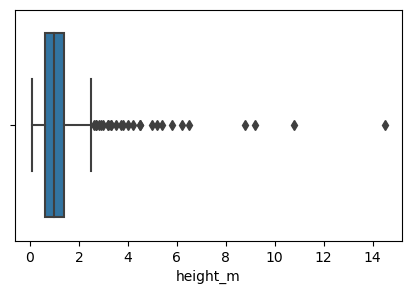

In [24]:
plt.figure(figsize=(5,3))
#create box plots to show dist of pokemon heights
sns.boxplot(poke_go_unique['height_m'])

(array([0., 1., 2., 3., 4., 5., 6., 7.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

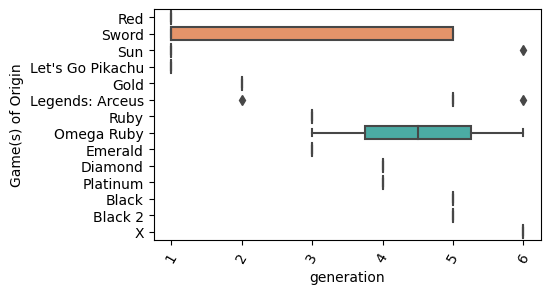

In [25]:
plt.figure(figsize=(5,3))
sns.boxplot(x =poke_go_unique['generation'], y = poke_go_unique['Game(s) of Origin'])
plt.xticks(rotation = 60)

<AxesSubplot:xlabel='status', ylabel='hp'>

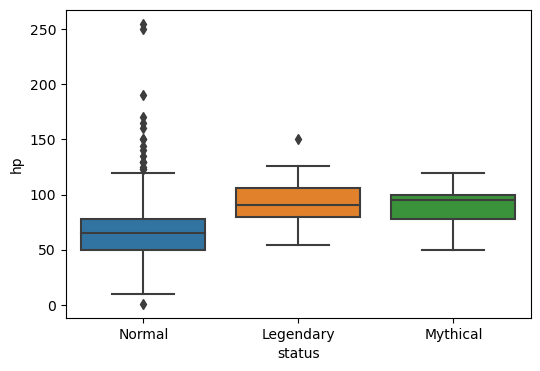

In [26]:
plt.figure(figsize=(6,4))
sns.boxplot(y= poke_go_unique['hp'], x=poke_go_unique['status'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Grass'),
  Text(1, 0, 'Fire'),
  Text(2, 0, 'Water'),
  Text(3, 0, 'Bug'),
  Text(4, 0, 'Normal'),
  Text(5, 0, 'Dark'),
  Text(6, 0, 'Poison'),
  Text(7, 0, 'Electric'),
  Text(8, 0, 'Ice'),
  Text(9, 0, 'Fairy'),
  Text(10, 0, 'Ground'),
  Text(11, 0, 'Fighting'),
  Text(12, 0, 'Psychic'),
  Text(13, 0, 'Rock'),
  Text(14, 0, 'Ghost'),
  Text(15, 0, 'Dragon'),
  Text(16, 0, 'Steel'),
  Text(17, 0, 'Flying')])

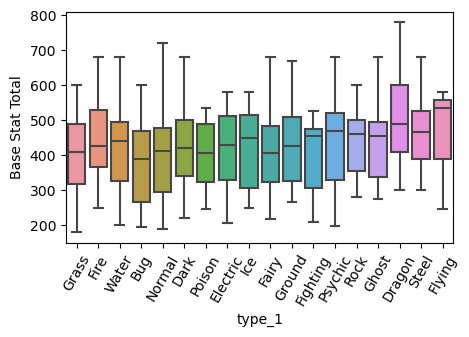

In [27]:
plt.figure(figsize=(5,3))
sns.boxplot(y= poke_go_unique['Base Stat Total'], x=poke_go_unique['type_1'])
plt.xticks(rotation=60)

The above box plots are an easy way to visualize the distribution of stats across different variables

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Grass'),
  Text(1, 0, 'Fire'),
  Text(2, 0, 'Water'),
  Text(3, 0, 'Bug'),
  Text(4, 0, 'Normal'),
  Text(5, 0, 'Dark'),
  Text(6, 0, 'Poison'),
  Text(7, 0, 'Electric'),
  Text(8, 0, 'Ice'),
  Text(9, 0, 'Fairy'),
  Text(10, 0, 'Ground'),
  Text(11, 0, 'Fighting'),
  Text(12, 0, 'Psychic'),
  Text(13, 0, 'Rock'),
  Text(14, 0, 'Ghost'),
  Text(15, 0, 'Dragon'),
  Text(16, 0, 'Steel'),
  Text(17, 0, 'Flying')])

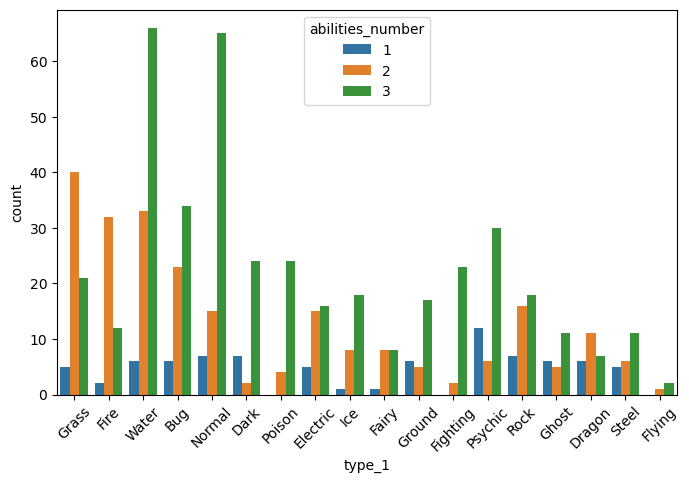

In [28]:
plt.figure(figsize=(8,5))
#create bargraph that counts and groups_by the number of type_1 pokemon and colors the bars by the number of abilities 
sns.countplot(x = 'type_1', hue = 'abilities_number' , data = poke_go_unique)
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Grass'),
  Text(1, 0, 'Fire'),
  Text(2, 0, 'Water'),
  Text(3, 0, 'Bug'),
  Text(4, 0, 'Normal'),
  Text(5, 0, 'Dark'),
  Text(6, 0, 'Poison'),
  Text(7, 0, 'Electric'),
  Text(8, 0, 'Ice'),
  Text(9, 0, 'Fairy'),
  Text(10, 0, 'Ground'),
  Text(11, 0, 'Fighting'),
  Text(12, 0, 'Psychic'),
  Text(13, 0, 'Rock'),
  Text(14, 0, 'Ghost'),
  Text(15, 0, 'Dragon'),
  Text(16, 0, 'Steel'),
  Text(17, 0, 'Flying')])

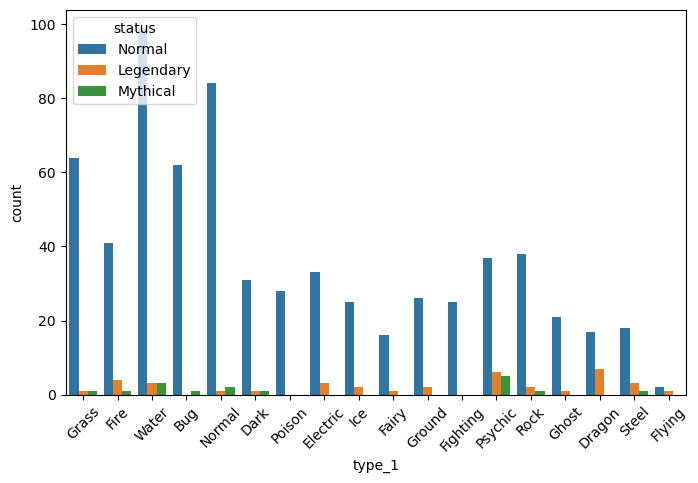

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'type_1', hue = 'status' , data = poke_go_unique)
plt.xticks(rotation = 45)

The above graph shows that the main poklemon status across all types is normal status

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

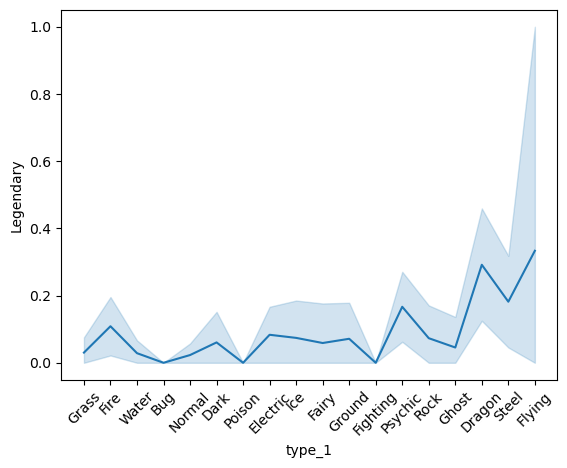

In [30]:
sns.lineplot(data=poke_go_unique, x = 'type_1', y= 'Legendary')
plt.xticks(rotation = 45)

Above are simple graphs to show the distribution of base statistics amongst the pokemon

In [31]:
#create scatter plot of different generations of pokemon and their defense and attack points
#using hover_name allows the for the user to hover over a point and the pokemon name and stats will appear
fig = px.scatter(data_frame=poke_go_unique, x='attack', y='defense', color="generation", hover_name="name")
fig.show()

In [32]:
fig = px.scatter(data_frame=poke_go_unique, x='attack', y='defense', color="Game(s) of Origin", hover_name="name")
fig.show()

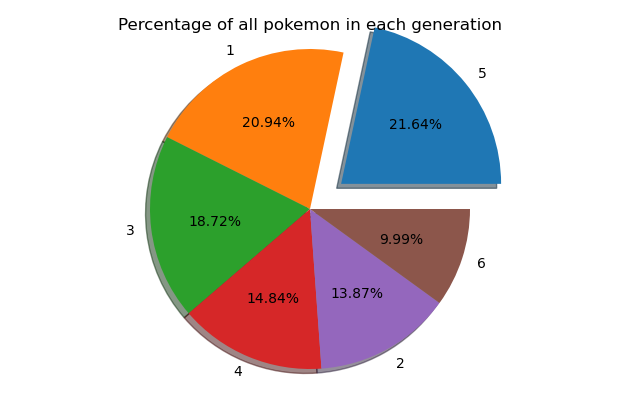

In [33]:
#pie chart of generations
generation = dict(poke_go_unique['generation'].value_counts())
gen_counts = list(generation.values())
#create variable with list of the generation determinations
gen = list(generation.keys())

# Find the index of the largest slice
max_index = gen_counts.index(max(gen_counts))

# Create the explode list
explode = [0] * len(gen)
#explode the largest slice
explode[max_index] = 0.25 

fig = plt.figure(figsize=(6, 4))
fig.suptitle('Percentage of all pokemon in each generation')
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
plt.pie(gen_counts, labels=gen, autopct='%1.2f%%', shadow=True, explode=explode)
plt.show()


In [34]:
correlation_matrix = poke_go_unique.corr()
#correlation_matrix_S = poke_go_unique.corr(method='spearman')
#correlation_matrix_K = poke_go_unique.corr(method='kendall')

#print(correlation_matrix)

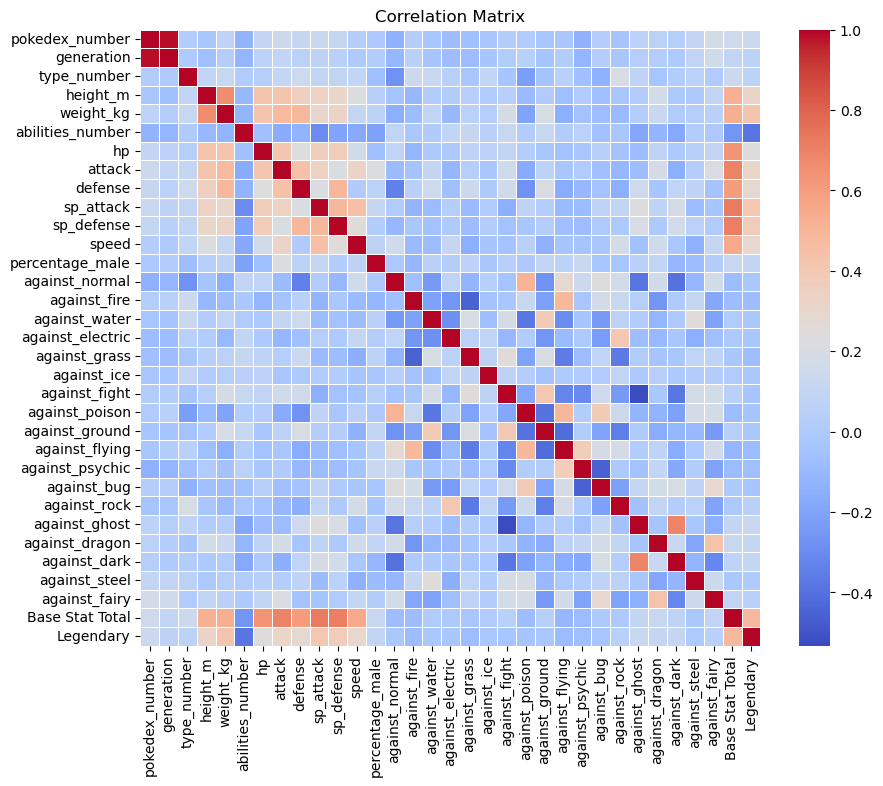

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title('Correlation Matrix')
plt.show()

The above heat map and correlation matrix shows various levels of correlation between different variables. It appears that most variables are not strongly correlated with eachother but there are some that are strong that we might want to look into later on. For example, the 'against_' catagories being correlated are interesting becasue this suggests that there are multiple types a pokemon might be strong against. If a pokemon is strong against poison, it also appears that they would be strong against normal types as well.

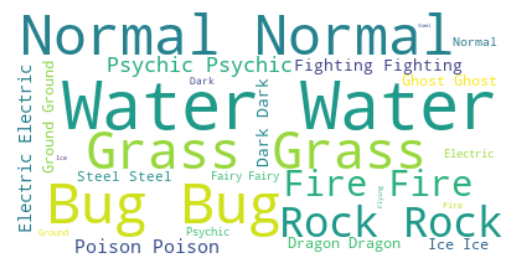

In [36]:
#use the unstructured columns to still provide insight into the data set

from wordcloud import WordCloud
# combine all type_1 values into a single string
type_1_text = ' '.join(poke_go_unique['type_1'].dropna().values)

# create a WordCloud 
wordcloud = WordCloud(background_color='white').generate(type_1_text)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

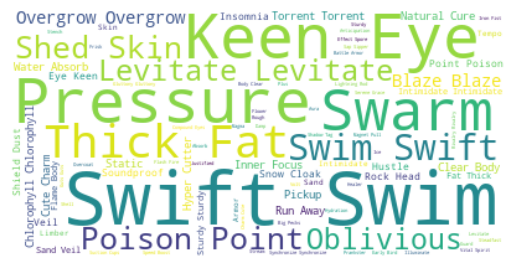

In [37]:
#do the same for ability_1
ability_1_text = ' '.join(poke_go_unique['ability_1'].dropna().values)
wordcloud_ability = WordCloud(background_color='white').generate(ability_1_text)

plt.imshow(wordcloud_ability, interpolation='bilinear')
plt.axis('off')
plt.show()

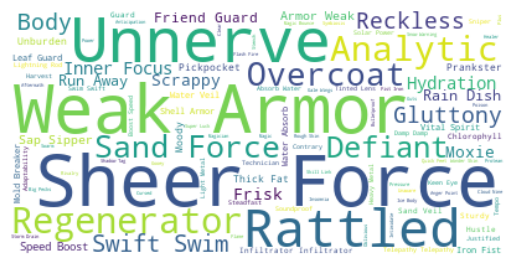

In [38]:
ability_hidden_text = ' '.join(poke_go_unique['ability_hidden'].dropna().values)
wordcloud_hidden = WordCloud(background_color='white').generate(ability_hidden_text)

plt.imshow(wordcloud_hidden, interpolation='bilinear')
plt.axis('off')
plt.show()

These word clouds are a great way to vizualize the distribution of the unstructured data. The larger the word, the more times it shows up in the specified data. For example, in the first word cloud, we can see the most common type_1 is water, then normal, then bug, and so on. This can be verified by the program below.

In [39]:
type_counts = poke_go_unique['type_1'].value_counts().reset_index()
type_counts.columns = ['Type', 'Count']
type_counts = type_counts.sort_values(by='Count', ascending=False)
print(type_counts)

        Type  Count
0      Water    105
1     Normal     87
2      Grass     66
3        Bug     63
4    Psychic     48
5       Fire     46
6       Rock     41
7   Electric     36
8       Dark     33
10    Ground     28
9     Poison     28
11       Ice     27
12  Fighting     25
13    Dragon     24
14     Steel     22
15     Ghost     22
16     Fairy     17
17    Flying      3


****

MODELING

CHI-Square test

In [40]:
#creating chi-square tests to check relationships between variables
from scipy.stats import chi2_contingency

# create a contingency table
contingency_table = pd.crosstab(poke_go_unique['type_1'], poke_go_unique['Legendary'])

# perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p_value)


Chi-square statistic: 53.95257465601899
P-value: 1.0080098342069788e-05


The above result suggests a significant discrepency between the observed and expected frequencies.The p-value is very close to zero suggesting there is string evidence to reject the null hypothesis, meaning that there is a significant assocaition between type_1 and legendary variables. This could mean that Legendary pokemon fall into a small number of Type categories.

In [41]:
legendary_pokemon = poke_go_unique[poke_go_unique['Legendary'] == True]
grouped_pokemon = legendary_pokemon.groupby('type_1')
legendary_count = grouped_pokemon.size()
print(legendary_count)


type_1
Dark        2
Dragon      7
Electric    3
Fairy       1
Fire        5
Flying      1
Ghost       1
Grass       2
Ground      2
Ice         2
Normal      2
Psychic     8
Rock        3
Steel       4
Water       3
dtype: int64


This is further evidence that there is a strong assocaition between a pokemons legendary status and their primary type. Most legendary pokemons are Dragon, Fairy or Fire types. 

In [42]:
contingency_table = pd.crosstab(poke_go_unique['Base Stat Total'], poke_go_unique['name'].str.contains('Mega'))

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the test results
print('Chi-square statistic:', chi2)
print('P-value:', p_value)
print('Degrees of freedom:', dof)

Chi-square statistic: 180.55118284956683
P-value: 0.5164181664357146
Degrees of freedom: 182


Interestingly, the p-value is quite high which suggests that there is no siginificant association between Base Stat Total and the Mega evolution of a pokemon

LINEAR REGRESSION

In [43]:
#linear regression to detrmine what factors go into making a string pokemon based on Base Stat Total points
import statsmodels.api as sm

# choose the predictor variables
predictors = poke_go_unique[['generation','type_number','height_m', 'weight_kg', 'abilities_number', 'hp', 'attack','defense', 'sp_attack', 'speed',\
                              'against_normal', 'against_fire', 'against_water', 'against_electric', 'against_grass', 'against_ice', 'against_fight', \
        	                    'against_poison', 'against_ground',	'against_flying', 'against_psychic', 'against_bug',	'against_rock',	'against_ghost',\
                                'against_dragon', 'against_dark', 'against_steel', 'against_fairy']]
#predictors = poke_go_unique.iloc[:, [2, 5, 8, 9, 10] + list(range(14, 39))]

# ddd a constant column to make sure intercept is included
predictors = sm.add_constant(predictors)

# set the target/intercept variable
target = poke_go_unique['Base Stat Total']

# fit the ols model
model = sm.OLS(target, predictors).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Base Stat Total   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     609.8
Date:                Sun, 11 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:04:01   Log-Likelihood:                -3243.4
No. Observations:                 721   AIC:                             6545.
Df Residuals:                     692   BIC:                             6678.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.4619     13.753  

Results: Very high R-Squared and adjusted R-squared value as well as a high F-statistic all suggest this is a good model. However, each of the independent variables has a very differnt p-value and not all of them are helpful to the model. The variables that we want to focus will have p-values lower than .05. These are hp, attack ,defense, speed, sp_attack, againts_fairy, against_dark, against_bug, and against_grass. With this information, we will want to try again with a new model containing just the variable with the lower p-values to get a model that really fits so we can verify what independent variable has the largest effect on the dependent variablke which is Base Total Stat.


In [44]:
#rtevised linear regression

predictors_new = poke_go_unique[['hp', 'attack','defense', 'sp_attack', 'speed', 'against_grass', 'against_bug', 'against_dark', 'against_fairy']]


# ddd a constant column to make sure intercept is included
predictors_new = sm.add_constant(predictors_new)

# set the target/intercept variable
target_new = poke_go_unique['Base Stat Total']

# fit the ols model
model_new = sm.OLS(target_new, predictors_new).fit()

print(model_new.summary())

                            OLS Regression Results                            
Dep. Variable:        Base Stat Total   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     1904.
Date:                Sun, 11 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:04:01   Log-Likelihood:                -3251.6
No. Observations:                 721   AIC:                             6523.
Df Residuals:                     711   BIC:                             6569.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.5301      4.508      1.670

The new model looks much better overall. We still have a high R-Squared vale and a high F-statistic, but now, all of the p-values of the variables are much closer to the .05 threshold. Looking at the coefficients, we can see that against_dark had the greatest oevrall effect on a pokemons Base Stat Total. For every 1 unit increase in against_dark, Base Stat Total will rise by 6.6734. It is likely then, that pokemon that are stroing against Dark types, will have a higher Base Stat Total overall and might be pokemon we want to be collecting.

In [45]:
#linear regression w/o the against types

predictors2 = poke_go_unique[['hp', 'attack','defense', 'sp_attack', 'speed']]
predictors2 = sm.add_constant(predictors2)

target2 = poke_go_unique['Base Stat Total']

model2 = sm.OLS(target2, predictors2).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:        Base Stat Total   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     3315.
Date:                Sun, 11 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:04:01   Log-Likelihood:                -3265.0
No. Observations:                 721   AIC:                             6542.
Df Residuals:                     715   BIC:                             6569.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6528      3.341      4.086      0.0

In [46]:
#linear regression with attack as dependent variable and all of the against types
predictors3 = poke_go_unique[['against_normal', 'against_fire', 'against_water', 'against_electric', 'against_grass', 'against_ice', 'against_fight', \
        	                    'against_poison', 'against_ground',	'against_flying', 'against_psychic', 'against_bug',	'against_rock',	'against_ghost',\
                                'against_dragon', 'against_dark', 'against_steel', 'against_fairy']]

predictors3 = sm.add_constant(predictors3)
target3 = poke_go_unique['attack']

model3 = sm.OLS(target3, predictors3).fit()

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                 attack   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     6.572
Date:                Sun, 11 Jun 2023   Prob (F-statistic):           2.49e-15
Time:                        16:04:01   Log-Likelihood:                -3405.5
No. Observations:                 721   AIC:                             6849.
Df Residuals:                     702   BIC:                             6936.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               93.2641     15.361  

In [47]:
#linear regression to detrmine what variables might effect a legendary pokemon

predictorsL = poke_go_unique[['generation','type_number','height_m', 'weight_kg', 'abilities_number', 'hp', 'attack','defense', 'sp_attack', 'speed',\
                              'against_normal', 'against_fire', 'against_water', 'against_electric', 'against_grass', 'against_ice', 'against_fight', \
        	                    'against_poison', 'against_ground',	'against_flying', 'against_psychic', 'against_bug',	'against_rock',	'against_ghost',\
                                'against_dragon', 'against_dark', 'against_steel', 'against_fairy']]

predictorsL = sm.add_constant(predictorsL)
targetL = poke_go_unique['Legendary']
modelL = sm.OLS(targetL, predictorsL).fit()

print(modelL.summary())

                            OLS Regression Results                            
Dep. Variable:              Legendary   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     14.98
Date:                Sun, 11 Jun 2023   Prob (F-statistic):           4.45e-54
Time:                        16:04:01   Log-Likelihood:                 163.63
No. Observations:                 721   AIC:                            -269.3
Df Residuals:                     692   BIC:                            -136.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0532      0.122  

MACHINE LEARNING AND PREDICTIONS

In [48]:
'''#split the data to test if we can predict legendary pokemon
X_train = poke_go_unique.drop('Legendary', axis=1)
y_train = poke_go_unique['Legendary']
X_test = test.copy()'''

"#split the data to test if we can predict legendary pokemon\nX_train = poke_go_unique.drop('Legendary', axis=1)\ny_train = poke_go_unique['Legendary']\nX_test = test.copy()"

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report



In [50]:
#pokemon_ml = poke_go_unique
pokemon_ml = pd.read_csv('pokemon.csv')
combats_ml = pd.read_csv('combats.csv')

In [51]:
#combat data set shows battles bewteen two pokemon. 
combats_ml.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [52]:
pokemon_ml.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [53]:
#Fill the missing values in Type 2 to NA  
pokemon_ml["Type 2"] = pokemon_ml["Type 2"].fillna("NA")
#Change the True or False in Legendary to 0 or 1 
pokemon_ml['Legendary']= pokemon_ml['Legendary'].astype(int)

In [54]:
#need to convert the catagorical columns (type 1 and type 2) to numerical columns using one-hot encoding method 
d1 = pd.get_dummies(pokemon_ml['Type 1'])
d2 = pd.get_dummies(pokemon_ml['Type 2'])

# drop the orginal 'Type 1' and 'Type 2' columns from the Pokemon dataset
pokemon_ml = pokemon_ml.drop(columns=['Type 1', 'Type 2'])

# concatenate the one-hot encoded dataframes with the original dataset
pokemon_ml = pd.concat([pokemon_ml, d1, d2], axis=1)

pokemon_ml.head()

,#,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,NA,Normal,Poison,Psychic,Rock,Steel,Water
0,1,Bulbasaur,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,Ivysaur,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3,Venusaur,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Mega Venusaur,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5,Charmander,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [55]:
# Concatenate the one-hot encoded dataframes with the original Pokemon dataset
pokemon_ml = pd.concat([pokemon_ml, d1, d2], axis=1)

#create new variable called x by selecting data for poekmon with pokedex # 266
x = pokemon_ml.loc[pokemon_ml["#"] == 266].values[:, 2:][0]
print(x)
#create new variable called y by selecting data for poekmon with pokedex # 298
y = pokemon_ml.loc[pokemon_ml["#"] == 298].values[:, 2:][0]
print(y)
#concatenates the x and y variables into an array and stored in variable called z
z = np.concatenate((x, y))
z

[50 64 50 45 50 41 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0]
[70 70 40 60 40 60 3 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


array([50, 64, 50, 45, 50, 41, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 70, 70, 40,
       60, 40, 60, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=object)

In [56]:
#create empty list
poke_data = []
#iterate over each row in the combats_ml dataframe and pull info about each battle
i = 0
for b in combats_ml.itertuples():
    #adds 1 to i to help track iterations
    i += 1
    print(i)
    #assigns value of the first column(pokemon) in current row to variable first pokemon
    first_pokemon = b[1]
    #assigns value of the second column(pokemon) in current row to variable second pokemon
    second_pokemon = b[2]
    #assigns value of the third column to the variable winner
    winner = b[3]
    
    # selects rows where the "#" column is equal to the value of the variable first_pokemon then selects the values of columns starting from the third column
    x = pokemon_ml.loc[pokemon_ml["#"] == first_pokemon].values[:, 2:][0]
    
    y = pokemon_ml.loc[pokemon_ml["#"] == second_pokemon].values[:, 2:][0]
    #calculates difference between the earlier arrays(x,y) and stores only the first 6 elements
    diff = (x - y)[:6]
    #new variable (z) crated to store the concatanation of x and y
    z = np.concatenate((x, y))
    
    #checks if winner is the same as the first pokemon
    if winner == first_pokemon:
        #if above condition is true, it means that the first pokemon is the winner so append the label 0 to the array z 
        z = np.append(z, [0])
    else:
        #if false, it means the second pokemoin is the winner so append 1 the the array z
        z = np.append(z, [1])
        
    poke_data.append(z)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160


161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410


In [57]:
#change from list to multidimensional array with the value sof the two pokemon in battle and the label indicating the winner
poke_data = np.asarray(poke_data)
print(poke_data)

[[50 64 50 ... 0 0 1]
 [91 90 72 ... 0 0 1]
 [55 40 85 ... 0 0 1]
 ...
 [60 50 100 ... 0 0 1]
 [40 30 50 ... 1 0 0]
 [78 104 78 ... 0 0 0]]


In [58]:
#separate the input features (X) and the target variable (y) from the poke_data array and convert to type int to use in classification task
X = poke_data[:, :-1].astype(int)
y = poke_data[:, -1].astype(int)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)

In [60]:
#run the classification model and print accuracy scores
clf = RandomForestClassifier(n_estimators=100)
model = clf.fit(X_train, y_train)
pred = model.predict(X_test)

print('Accuracy:', accuracy_score(pred, y_test))
print(classification_report(y_test, pred))

Accuracy: 0.93688
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      5957
           1       0.94      0.94      0.94      6543

    accuracy                           0.94     12500
   macro avg       0.94      0.94      0.94     12500
weighted avg       0.94      0.94      0.94     12500



The model achieved an accuracy of 0.93472. This means taht it correctly predicted the outcome of battles for approximately 93.47% of the Pokemon. The precision score for class 0(which was the losing pokemon) is .93 meaning that out of all the pokemon predicted as losers, 93% were classified correctly. The same can be said for the winners (1). Support just represents the number of instances for each class: class 0 had 5957 instances, and class 1 had 6543 instances.


TIME TO PREDICT SOME WINNERS....and losers

In [61]:
# prompt for user input of Pokédex numbers
pokemon1 = int(input('Enter the Pokédex number for Pokémon 1: '))
pokemon2 = int(input('Enter the Pokédex number for Pokémon 2: '))

# retrieve the names of the Pokémon from the original pokemon_ml dataset
pokemon1_name = pokemon_ml.loc[pokemon_ml['#'] == pokemon1, 'Name'].values[0]
pokemon2_name = pokemon_ml.loc[pokemon_ml['#'] == pokemon2, 'Name'].values[0]

# prepare the input data using the pokemon_ml dataset
x1 = pokemon_ml.loc[pokemon_ml['#'] == pokemon1].values[:, 2:][0]
x2 = pokemon_ml.loc[pokemon_ml['#'] == pokemon2].values[:, 2:][0]
battle_data = np.concatenate((x1, x2)).astype(int)

# Make the prediction using the trained model
prediction = model.predict([battle_data])

if prediction == 0:
    print('Pokemon 1:', pokemon1_name, 'is predicted to win the battle.')
else:
   print('Pokemon 2:', pokemon2_name, 'is predicted to win the battle.')
 

Pokemon 1: Machoke is predicted to win the battle.


IT WORKED!!!!!